In [1]:
import matplotlib.pyplot as plt
import pycroscopy
import ffta
import BGlib
import numpy as np
import sidpy
import h5py

c:\test_pycroscopy\ffta\ffta\pixel_utils\parab.py:8: UserWarning: cuPy not installed; no GPU available
  warnings.warn('cuPy not installed; no GPU available')


In [13]:
# .ibw 파일을 h5파일 형식으로 변환하기

ibw_folder = 'FFTA_custom/perovskite' # Force-Frequency 정보가 담긴 ibw모인 폴더
topo_path = 'FFTA_custom/data.ibw' # topology 정보가 담긴 ibw
h5_path , param_dict, h5_avg = ffta.load.load_hdf.load_wrapper(ibw_file_path=topo_path, 
                                ff_file_path= ibw_folder)

c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\sidpy\sid\translator.py:42: FutureWarning: Consider using sidpy.Reader instead of sidpy.Translator if possible and contribute your reader to ScopeReaders
  warn('Consider using sidpy.Reader instead of sidpy.Translator if '
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer cr

FFTA_custom/perovskite folder path
Loading first signal
#### FFtrEFM_0002.ibw ####
#### FFtrEFM_0003.ibw ####
#### FFtrEFM_0004.ibw ####
#### FFtrEFM_0005.ibw ####
#### FFtrEFM_0006.ibw ####
#### FFtrEFM_0007.ibw ####
#### FFtrEFM_0008.ibw ####
#### FFtrEFM_0009.ibw ####
#### FFtrEFM_0010.ibw ####
#### FFtrEFM_0011.ibw ####
#### FFtrEFM_0012.ibw ####
#### FFtrEFM_0013.ibw ####
#### FFtrEFM_0014.ibw ####
#### FFtrEFM_0015.ibw ####
#### FFtrEFM_0016.ibw ####
#### FFtrEFM_0017.ibw ####
#### FFtrEFM_0018.ibw ####
#### FFtrEFM_0019.ibw ####
#### FFtrEFM_0020.ibw ####
#### FFtrEFM_0021.ibw ####
#### FFtrEFM_0022.ibw ####
#### FFtrEFM_0023.ibw ####
#### FFtrEFM_0024.ibw ####
#### FFtrEFM_0025.ibw ####
#### FFtrEFM_0026.ibw ####
#### FFtrEFM_0027.ibw ####
#### FFtrEFM_0028.ibw ####
#### FFtrEFM_0029.ibw ####
#### FFtrEFM_0030.ibw ####
#### FFtrEFM_0031.ibw ####
*** Copy-Paste below code for IDE access to h5***
import h5py
h5_file = h5py.File(r'FFTA_custom\data.h5')
h5_avg = h5_file['FF_Group/F

In [ ]:
# topology 데이터가 담긴 ibw이름으로 .h5파일이 생성된다.
# charging_000, height_000, shift_000에 대해 (8192,1)이라는 데이터가 있는데 의미하는바를 모르겠다. indices가 전부 arb로 되어있음.
h5_file = h5py.File(r'FFTA_custom\data.h5')
sidpy.hdf_utils.print_tree(h5_file)

/
├ FF_Group
  --------
  ├ FF_Avg
  ├ Position_Indices
  ├ Position_Values
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ Position_Indices
├ Position_Values
├ Spectroscopic_Indices
├ Spectroscopic_Values
├ charging_000
  ------------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ height_000
  ----------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ shift_000
  ---------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values


In [ ]:
# 차례로 위에서부터 Charging_000, height_000, shift_000
# 전체 트리구조에서 Raw_Data를 찾아준다.
sidpy.hdf_utils.find_dataset(h5_group=h5_file,dset_name='Raw_Data')

[<HDF5 dataset "Raw_Data": shape (8192, 1), type "<f4">,
 <HDF5 dataset "Raw_Data": shape (8192, 1), type "<f4">,
 <HDF5 dataset "Raw_Data": shape (8192, 1), type "<f4">]

In [ ]:
# Force-Frequency 
h5_file['FF_Group/FF_Avg']

<HDF5 dataset "FF_Avg": shape (3840, 16000), type "<f4">

In [ ]:
# 위의 3840이란 숫자 : X*Y로 128*30을 의미한다. 총 픽셀의 수
# 16000은 여기서 Spectroscopic Value가 1차원이라 16000그대로 된다.
# 가끔은 Cycle, Field 등 n차원으로 구성된 경우도 있으며 이 경우 모든 것들의 곱으로 표현된다.
h5_avg

<HDF5 dataset "FF_Avg": shape (3840, 16000), type "<f4">
located at: 
	/FF_Group/FF_Avg 
Data contains: 
	Deflection (V) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 30 
	X - size: 128 
Spectroscopic Dimensions: 
	Time - size: 16000
Data Type:
	float32

In [50]:
# 같은 FF_Avg를 나타내지만 usid데이터 형식이면 위와 같이 데이터 정보를 파악하기 쉽다.
import pyUSID as usid
usid.io.usi_data.USIDataset(h5_file['FF_Group/FF_Avg'])

<HDF5 dataset "FF_Avg": shape (3840, 16000), type "<f4">
located at: 
	/FF_Group/FF_Avg 
Data contains: 
	Deflection (V) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 30 
	X - size: 128 
Spectroscopic Dimensions: 
	Time - size: 16000
Data Type:
	float32

In [51]:
# 그 외의 파라미터들은 param_dict로 파악 가능하지만
# 1. param_dict를 출력한다
# 2. attrs.item으로 파악하기
param_dict

{'trigger': 0.00048,
 'total_time': 0.0016,
 'drive_freq': 62751.0,
 'sampling_rate': 10000000.0,
 'n_pixels': 128,
 'pts_per_pixel': 32,
 'roi': 0.0003,
 'FastScanSize': 1.2e-05,
 'SlowScanSize': 2.8125e-06,
 'lift_height': 25.0,
 'window': 'blackman',
 'n_taps': 999,
 'filter_bandwidth': 10000,
 'bandpass_filter': 1,
 'wavelet_analysis': 0,
 'wavelet_parameter': 0,
 'recombination': 0,
 'phase_fitting': 0,
 'num_rows': 30,
 'num_cols': 128,
 'pnts_per_avg': 16000,
 'pnts_per_pixel': 1,
 'pnts_per_line': 128}

In [ ]:
# 위보다 조금 더 자세하게 정보를 반환한다.
for k, v in h5_file['FF_Group/FF_Avg'].attrs.items():
    print(k,v)

FastScanSize 1.2e-05
Position_Indices <HDF5 object reference>
Position_Values <HDF5 object reference>
SlowScanSize 2.8125e-06
Spectroscopic_Indices <HDF5 object reference>
Spectroscopic_Values <HDF5 object reference>
bandpass_filter 1
drive_freq 62751.0
filter_bandwidth 10000
lift_height 25.0
machine_id BOOK-GS3S7954PH
n_pixels 128
n_taps 999
num_cols 128
num_rows 30
phase_fitting 0
platform Windows-10-10.0.26100-SP0
pnts_per_avg 16000
pnts_per_line 128
pnts_per_pixel 1
pts_per_pixel 32
pyUSID_version 0.0.12
quantity Deflection
recombination 0
roi 0.0003
sampling_rate 10000000.0
sidpy_version 0.12.6
timestamp 2025_03_09-14_52_11
total_time 0.0016
trigger 0.00048
units V
wavelet_analysis 0
wavelet_parameter 0
window blackman


In [ ]:
# SVD 적용
h5_svd = ffta.analysis.svd.test_svd(h5_avg,show_plots=False,num_components=100)

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file


c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\sklearn\utils\extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


Took 4.5 sec to compute randomized SVD


c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer creates'


Need 1 components for 80%
Need 1 components for 90%
Need 2 components for 95%
Need 55 components for 99%


In [ ]:
# 자동으로 S,U,V가 생성된 것을 확인할 수 있다. 
sidpy.hdf_utils.print_tree(h5_file)

/
├ FF_Group
  --------
  ├ FF_Avg
  ├ FF_Avg-SVD_000
    --------------
    ├ Position_Indices
    ├ Position_Values
    ├ S
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ U
    ├ V
    ├ completed_positions
  ├ Position_Indices
  ├ Position_Values
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ Position_Indices
├ Position_Values
├ Spectroscopic_Indices
├ Spectroscopic_Values
├ charging_000
  ------------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ height_000
  ----------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ shift_000
  ---------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values


In [ ]:
# num_components를 변경하여 진행 / randomized SVD방식을 채택하였다.
h5_svd = ffta.analysis.svd.test_svd(h5_avg,show_plots=False,num_components=128)
sidpy.hdf_utils.print_tree(h5_file)

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file

Note: SVD has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/FF_Group/FF_Avg-SVD_000" (8 members)>]


c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\sklearn\utils\extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


Took 5.33 sec to compute randomized SVD


c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer creates'


Need 1 components for 80%
Need 1 components for 90%
Need 2 components for 95%
Need 83 components for 99%
/
├ FF_Group
  --------
  ├ FF_Avg
  ├ FF_Avg-SVD_000
    --------------
    ├ Position_Indices
    ├ Position_Values
    ├ S
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ U
    ├ V
    ├ completed_positions
  ├ FF_Avg-SVD_001
    --------------
    ├ Position_Indices
    ├ Position_Values
    ├ S
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ U
    ├ V
    ├ completed_positions
  ├ Position_Indices
  ├ Position_Values
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ Position_Indices
├ Position_Values
├ Spectroscopic_Indices
├ Spectroscopic_Values
├ charging_000
  ------------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ height_000
  ----------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ shift_000
  ---------
  ├ Position_Indic

In [ ]:
# 원본 이미지는 30x128이므로 복원해보기 / param_dict 안에 num_rows,num_cols로도 존재
# n_components=100으로 설정한 SVD
U,V,S = h5_file['FF_Group/FF_Avg-SVD_000/U'],h5_file['FF_Group/FF_Avg-SVD_000/V'],h5_file['FF_Group/FF_Avg-SVD_000/S']
print(U.shape,V.shape,S.shape)

(3840, 100) (100, 16000) (100,)


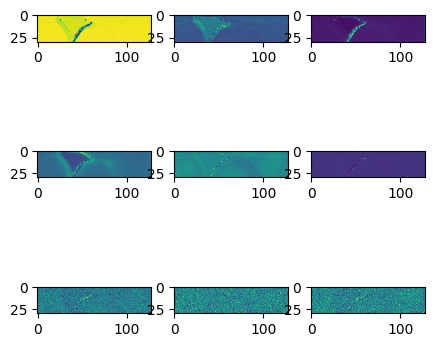

In [ ]:
# 3840은 30x128로 reshape
maps = np.reshape(U,(30,128,-1)) # 9개만 그려보기

fig,axes = plt.subplots(3,3,figsize=(5,5))
for i in range(3):
    for j in range(3):
        axes[i,j].imshow(maps[:,:,i*3+j])

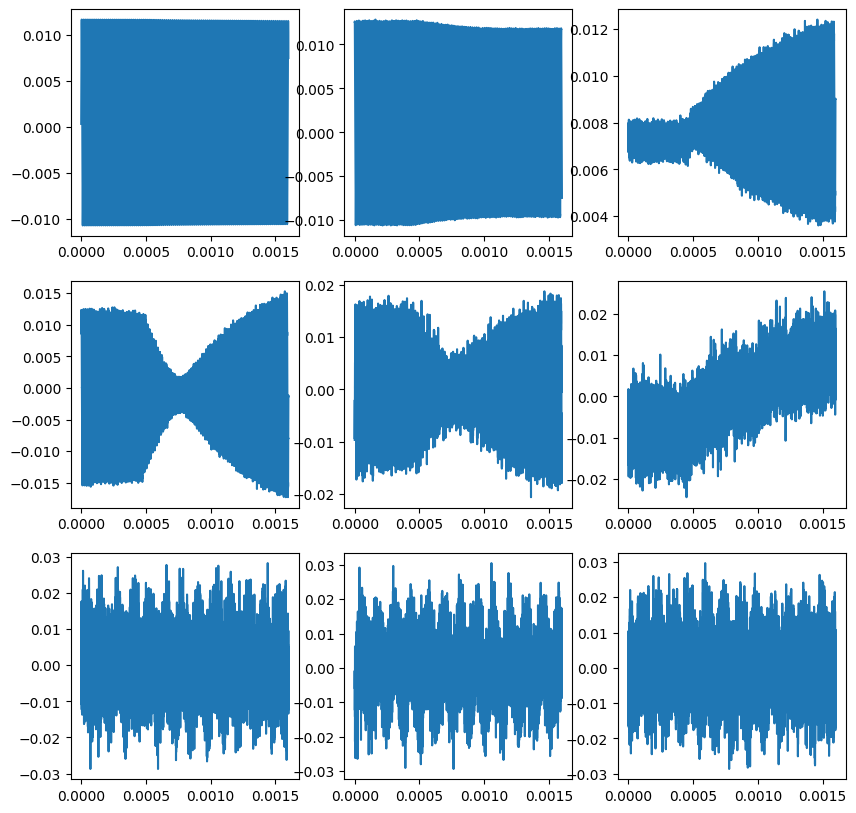

In [ ]:
fig,axes = plt.subplots(3,3,figsize=(10,10))
# 9개 주파수 그려보기
time = h5_avg.get_spec_values('Time')
for i in range(3):
    for j in range(3):
        axes[i][j].plot(time,V[i*3+j][:])

In [112]:
usid.io.usi_data.USIDataset(h5_file['FF_Group/FF_Avg'])

<HDF5 dataset "FF_Avg": shape (3840, 16000), type "<f4">
located at: 
	/FF_Group/FF_Avg 
Data contains: 
	Deflection (V) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 30 
	X - size: 128 
Spectroscopic Dimensions: 
	Time - size: 16000
Data Type:
	float32

In [144]:
h5_file['FF_Group/Spectroscopic_Values'][0]


array([0.0000000e+00, 1.0000625e-07, 2.0001249e-07, ..., 1.5998000e-03,
       1.5999000e-03, 1.6000000e-03], dtype=float32)

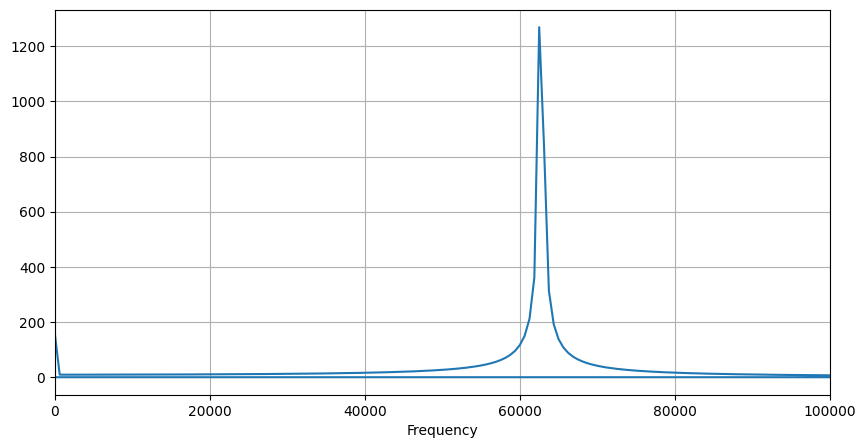

In [ ]:
# 푸리에 변환 해보려했는데 이렇게 하는건지 잘 모르겠다.
# h5_avg는 (3840,16000)으로 16000초에 대한 데이터
time_step = 1.0000625e-07
sampling_rate = 1/(time_step)

fft_data = np.fft.fft(h5_avg, axis=1)
freqs = np.fft.fftfreq(h5_avg.shape[1], d=1/sampling_rate)
fft_magnitude = np.abs(fft_data)
mean_spectrum = np.mean(fft_magnitude, axis=0)

plt.figure(figsize=(10, 5))
plt.plot(freqs,mean_spectrum)
plt.xlabel("Frequency")

plt.grid()
plt.xlim(0, 100000)
plt.show()


In [2]:
# Raw data가 어떤식으로 존재하는지는 모르겠지만 Oak Ridge National Laboratory에서 제공하는 .h5를 활용하면 아래와 같은 구조를 지닌다.
import h5py
import matplotlib.pyplot as plt
import numpy as np
import BGlib
import sidpy

h5_file = h5py.File('BGlib_custom\PTO_BEPS_50x50_0002.h5')
sidpy.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
    ├ Raw_Data-SHO_Fit_001
      --------------------
      ├ Fit
      ├ Fit-Loop_Fit_000
        ----------------
        ├ Fit
        ├ Fit_Loop_Parameters
        ├ Guess
        ├ Guess_Loop_Parameters
        ├ Loop_Metrics
        ├ Loop_Metrics_Indices
        ├ Loop_Metrics_Values
        ├ Projected_Loops
        ├ completed_fit_positions
        ├ completed_guess_positions
        ├ completed_positions
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
      ├ completed_positions
    ├ Spatially_Averaged_Plot_Group_000
     

In [8]:
import pyUSID as usid
main_data = usid.io.usi_data.USIDataset(h5_file['Measurement_000/Channel_000/Raw_Data'])
main_data

<HDF5 dataset "Raw_Data": shape (2500, 12544), type "<c8">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	quantity (a.u.) 
Data dimensions and original shape: 
Position Dimensions: 
	X - size: 50 
	Y - size: 50 
Spectroscopic Dimensions: 
	Frequency - size: 49 
	DC_Offset - size: 64 
	Field - size: 2 
	Cycle - size: 2
Data Type:
	complex64

In [19]:
# 필요한 정보들에 대해 이름으로 접근 가능 / Frequency,DC_Offset,Field,Cycle
main_data.get_spec_values('Frequency')[:3]

array([332885.75, 333374.03, 333862.3 ], dtype=float32)

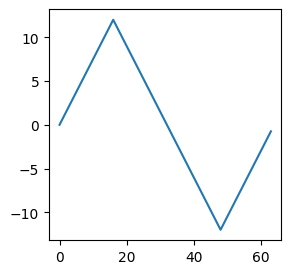

In [21]:
# DC_Offset 그리기
voltage = main_data.get_spec_values('DC_Offset')
plt.figure(figsize=(3,3))
plt.plot(voltage)

In [23]:
# 기존 데이터는 6차원이다. X,Y,Frequency,DC_Offset,Field,Cycle
# 이는 2차원으로 저장되어 있는데 USID데이터 형식을 만족하면 get_n_dim_form()을 통해 변형이 가능하다.
dim_form = main_data.get_n_dim_form()
print(dim_form.shape)

(50, 50, 49, 64, 2, 2)


In [ ]:
# 위의 숫자와 차원이 잘 맞는것을 확인해보고 작업을 해야한다.
main_data.n_dim_labels

['X', 'Y', 'Frequency', 'DC_Offset', 'Field', 'Cycle']

In [ ]:
# 특정 전압일 때만을 보고 싶다 / 또는 특정 주파수일 때만 보고 싶다면 slicing 기능을 활용한다. 딕셔너리 형태로 input
# return값이 2개다. 첫번째는 DC_Offset이 30일 때의 데이터 / 두번째는 성공여부
main_data.slice({'DC_Offset':30})[0].shape

(50, 50, 49, 2, 2)

In [ ]:
# 또는 numpy에서 제공하는 squeeze를 활용하기 -> squeeze는 1차원인 axis를 제거해주는 역할
np.squeeze(dim_form[:,:,:,30,:,:]).shape

(50, 50, 49, 2, 2)

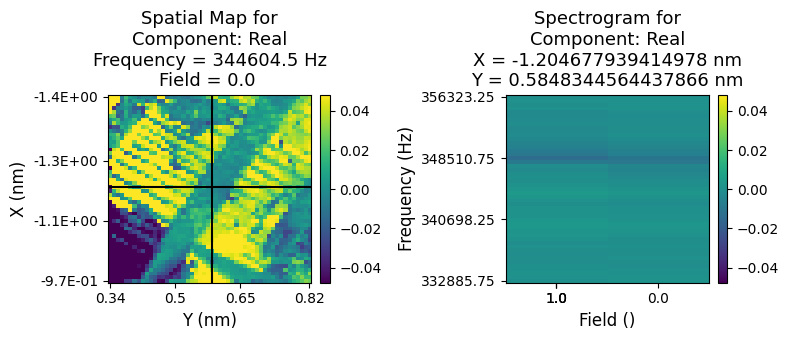

interactive(children=(IntSlider(value=24, description='X', max=49), IntSlider(value=24, description='Y', max=4…

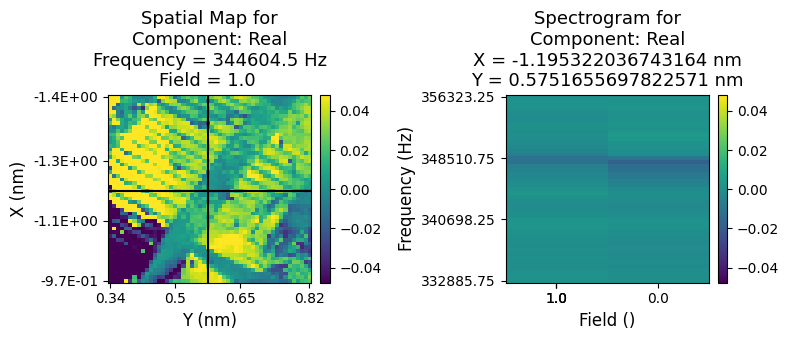

In [ ]:
# spectroscopic value가 4개 존재한다.(Frequency,DC_Offset,Field,Cycle) => 이중 2개는 고정된 값이어야 plot가능하다.
main_data.visualize(slice_dict = {"DC_Offset":30,"Cycle":0})

In [1]:
# url = 'https://raw.githubusercontent.com/pycroscopy/pyUSID/master/data/STS.zip'
# pycroscopy/pyUSID에서 제공하는 data / .asc file확장자

'''
.asc 내부 저장된 모습
# x-pixels = 100
# y-pixels = 100
# x-length = 29.7595
# y-length = 29.7595
# x-offset = -967.807
# y-offset = -781.441
'''
file_path = "STS/STS.asc"
with open(file_path) as f:
    lines = f.readlines()

In [ ]:
# 유의미한 데이터
lines[3:17]

['# x-pixels = 100\n',
 '# y-pixels = 100\n',
 '# x-length = 29.7595\n',
 '# y-length = 29.7595\n',
 '# x-offset = -967.807\n',
 '# y-offset = -781.441\n',
 '# z-points = 500\n',
 '# z-section = 491\n',
 '# z-unit = nV\n',
 '# z-range = 2e+009\n',
 '# z-offset = 1116.49\n',
 '# value-unit = nA\n',
 '# scanspeed = 5.9519e+010\n',
 '# voidpixels =0\n']

In [21]:
# #,\n 제거 후, 딕셔너리 형태로 저장
import re
params_dict = {}

for i in lines[3:17]:
    i = re.sub("[#\n]","",i)
    k,v = i.split("=")[0].strip() , i.split("=")[1].strip()
    params_dict[k] = v

params_dict

{'x-pixels': '100',
 'y-pixels': '100',
 'x-length': '29.7595',
 'y-length': '29.7595',
 'x-offset': '-967.807',
 'y-offset': '-781.441',
 'z-points': '500',
 'z-section': '491',
 'z-unit': 'nV',
 'z-range': '2e+009',
 'z-offset': '1116.49',
 'value-unit': 'nA',
 'scanspeed': '5.9519e+010',
 'voidpixels': '0'}

In [25]:
import numpy as np
num_rows = int(params_dict['y-pixels'])
num_cols = int(params_dict['x-pixels'])
num_pos = num_rows*num_cols
spectra_length = int(params_dict["z-points"])

#  x값으로는 -5nm~5nm, y값으로는 -3nm ~ 7nm
x_qty , y_qty = "X","Y"
x_units = y_units = 'nm'
x_vec , y_vec = np.linspace(-5,5,num_cols), np.linspace(-3,7,num_rows)

# Bias 는 -1~1V
bias_qty = "Bias"
bias_units = 'V'
bias_vec = np.linspace(-1,1,spectra_length)

In [ ]:
# 404줄부터 10403줄까지 아래와 같은 데이터의 반복이 이루어짐(100*100으로 1만줄)
# 한 줄에 500개씩 (bias가 500이므로 spectra_length=500)
print(len(lines))
for line in lines[402:405]:
    print(line.split('\t'))

10403
['# Start of Data:\n']
['-0.155886', '-0.116208', '-0.121187', '-0.124960', '-0.115773', '-0.116681', '-0.112523', '-0.118253', '-0.119314', '-0.119259', '-0.114184', '-0.118208', '-0.118642', '-0.114633', '-0.118307', '-0.116782', '-0.119700', '-0.116323', '-0.116749', '-0.131452', '-0.116043', '-0.120194', '-0.113718', '-0.109425', '-0.116337', '-0.107380', '-0.108900', '-0.113063', '-0.118584', '-0.112535', '-0.111389', '-0.112815', '-0.103584', '-0.134008', '-0.111644', '-0.0964785', '-0.104781', '-0.114076', '-0.102224', '-0.102436', '-0.103951', '-0.103170', '-0.101823', '-0.100254', '-0.0987520', '-0.0988294', '-0.0939529', '-0.0982899', '-0.0961751', '-0.0935294', '-0.0971913', '-0.101343', '-0.0923157', '-0.0911014', '-0.0910047', '-0.0892380', '-0.0893347', '-0.0853478', '-0.0819657', '-0.0844901', '-0.0885849', '-0.0881449', '-0.0859224', '-0.0860927', '-0.0812033', '-0.0830222', '-0.0822425', '-0.0821510', '-0.0779982', '-0.0946608', '-0.0855788', '-0.0847084', '-0.08

In [40]:
# 0으로 채워진 2d 생성 / size는 (10000,500) 
raw_data_2d = np.zeros(shape = (num_pos,spectra_length),dtype=np.float32)

for pos in range(num_pos):
    line = lines[403+pos]
    spec = line.split('\t')[:-1] # 마지막 원소는 \n
    raw_data_2d[pos] = np.array(spec,dtype = np.float32)

In [ ]:
raw_data_2d.shape

(10000, 500)

In [ ]:
# x,y,bias
raw_data_3d = raw_data_2d.reshape(num_rows,num_cols,-1)
raw_data_3d.shape

(100, 100, 500)

In [44]:
main_data_name = 'STS'
main_qty = 'Current'
main_units = 'nA'

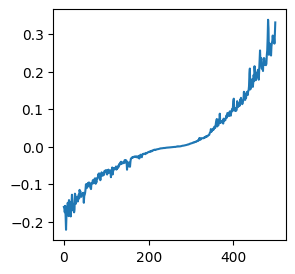

In [53]:
# x=3,y=4인 지점 plot
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
# x=3,y=4인 지점에서의 bias plot
plt.plot(raw_data_3d[3,4,:])

<Figure size 600x600 with 0 Axes>

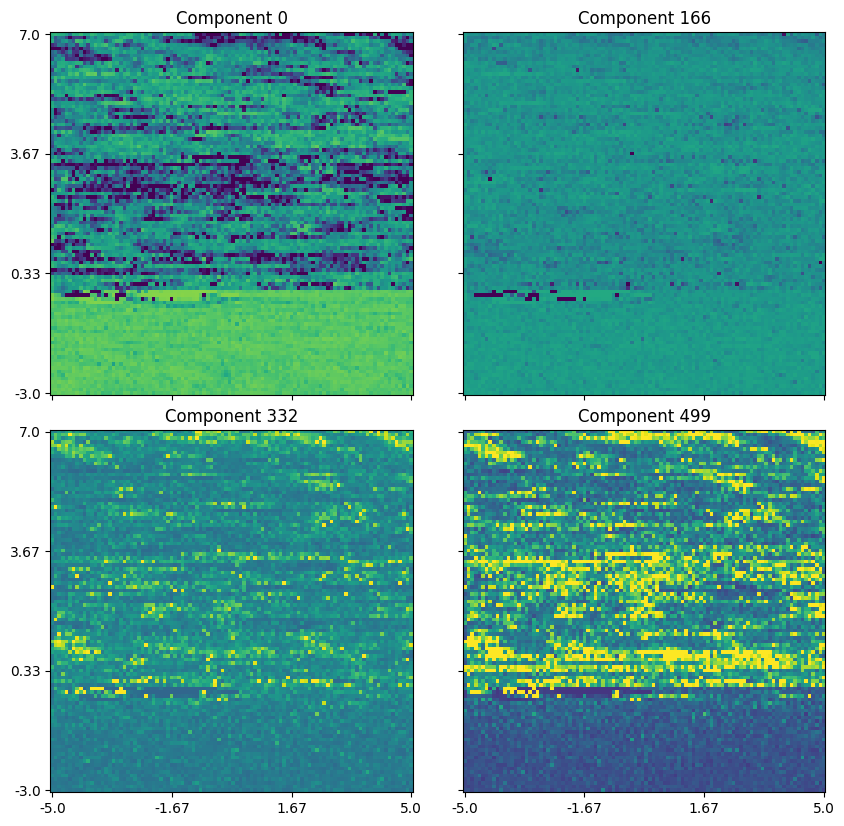

In [84]:
# 외부에서 가해준 bias에 따른 x,y의 모습 plot
import sidpy
plt.figure(figsize = (6,6))
fig, axes = sidpy.plot_utils.plot_map_stack(raw_data_3d, reverse_dims=True, x_vec=x_vec, y_vec=y_vec,
                                           evenly_spaced=True,num_comps=4)

In [ ]:
import pyUSID as usid

# 저장할 폴더,이름 설정, 기본적으로 h5py형태를 지원하므로 asc를 파일 변환하여 저장하도록
h5_path = 'STS/STS_modified.h5'

tran = usid.ArrayTranslator()

spec_dims = usid.Dimension(bias_qty, bias_units, bias_vec)
pos_dims = [usid.Dimension(x_qty, x_units, x_vec),
            usid.Dimension(y_qty, y_units, y_vec)]

tran = usid.ArrayTranslator()
tran.translate(h5_path, main_data_name,
                   raw_data_2d, main_qty, main_units,
                   pos_dims, spec_dims,
                   parm_dict=params_dict)

c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\sidpy\sid\translator.py:42: FutureWarning: Consider using sidpy.Reader instead of sidpy.Translator if possible and contribute your reader to ScopeReaders
  warn('Consider using sidpy.Reader instead of sidpy.Translator if '
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer cr

'STS/STS_modified.h5'

In [ ]:
import h5py

h5_file = h5py.File('STS/STS_modified.h5')
usid.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values


In [94]:
usid.io.usi_data.USIDataset(h5_file['Measurement_000/Channel_000/Raw_Data'])

<HDF5 dataset "Raw_Data": shape (10000, 500), type "<f4">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	Current (nA) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 100 
	X - size: 100 
Spectroscopic Dimensions: 
	Bias - size: 500
Data Type:
	float32

In [183]:
main_data = usid.io.usi_data.USIDataset(h5_file['Measurement_000/Channel_000/Raw_Data'])
main_data.get_spec_values

<bound method USIDataset.get_spec_values of <HDF5 dataset "Raw_Data": shape (10000, 500), type "<f4">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	Current (nA) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 100 
	X - size: 100 
Spectroscopic Dimensions: 
	Bias - size: 500
Data Type:
	float32>

In [186]:
print(main_data.h5_pos_inds)
print(main_data.h5_pos_vals)
print(main_data.h5_spec_inds)
print(main_data.h5_spec_vals)

<HDF5 dataset "Position_Indices": shape (10000, 2), type "<u4">
<HDF5 dataset "Position_Values": shape (10000, 2), type "<f4">
<HDF5 dataset "Spectroscopic_Indices": shape (1, 500), type "<u4">
<HDF5 dataset "Spectroscopic_Values": shape (1, 500), type "<f4">


In [190]:
spec_dims = [usid.Dimension(bias_qty, bias_units, bias_vec),
             usid.Dimension('Cycle','',[0,1])]
pos_dims = [usid.Dimension(x_qty, x_units, x_vec),
            usid.Dimension(y_qty, y_units, y_vec)]

In [200]:
h5_file = h5py.File('STS/STS_modified.h5','a')

In [202]:
new_h5_file = usid.hdf_utils.write_main_dataset(h5_file,(10000,1000),'Raw_Data','Voltage','V',
                                                 pos_dims,spec_dims,dtype=np.float32)

c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer creates'


In [204]:
new_h5_file

<HDF5 dataset "Raw_Data": shape (10000, 1000), type "<f4">
located at: 
	/Raw_Data 
Data contains: 
	Voltage (V) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 100 
	X - size: 100 
Spectroscopic Dimensions: 
	Cycle - size: 2 
	Bias - size: 500
Data Type:
	float32

In [ ]:
# raw_data반영이 Measurement000과 같은 위치로 들어감
usid.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
├ Position_Indices
├ Position_Values
├ Raw_Data
├ Spectroscopic_Indices
├ Spectroscopic_Values


In [209]:
h5_file['Raw_Data']

<HDF5 dataset "Raw_Data": shape (10000, 1000), type "<f4">